In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
plotly.tools.set_credentials_file(username='', api_key='')

In [0]:
!pip install pydub

#installation libraries

---



In [0]:
#relevant importants to the project
import numpy as np
import scipy as sc
import librosa  #audio and music processing library 
from sklearn.preprocessing import normalize as norm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import wave
from os.path import *
import os
from functools import partial
import struct
from sklearn.cluster import KMeans
import os
from numpy.random import randint
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from pydub import AudioSegment
from IPython.display import Audio
from sklearn.externals import joblib 
import pickle
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import metrics

#Data Aquisition

In [0]:
#point to correct paths
path = 'gdrive/My Drive/dsp_project/files/' 
music_dir = path +'music_files'
speech_dir = path + 'speech_files'

music_files = os.listdir(music_dir)
speech_files = os.listdir(speech_dir)

In [0]:
#loading all music and speech data 
music, speech = [], []

for i in range (len(music_files)):
    data, fs = librosa.load(music_dir+'/'+music_files[i])
    music.append(data)
    
for i in range(len(speech_files)):
    data, fs = librosa.load(speech_dir+'/'+speech_files[i])
    speech.append(data)

Sampling Frequency(Fs): 22050 Hz
There are 64 speech files and 64 music files
Total data size: 128


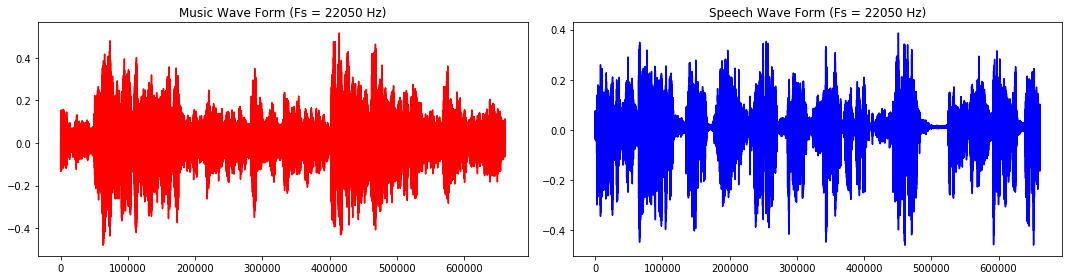

In [0]:
#visualisation of audio signals and other important information
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1, autoscale_on=True, aspect='auto')
plt.plot(music[0],color='r')
plt.title('Music Wave Form (Fs = 22050 Hz)')
plt.subplot(1,2,2,autoscale_on=True, aspect = 'auto')
plt.plot(speech[0], color = 'b')
plt.title('Speech Wave Form (Fs = 22050 Hz)')
plt.tight_layout()

print('Sampling Frequency(Fs): {Freq} Hz'.format(Freq=fs))
print('There are {speech_size} speech files and {music_size} music files'.format(speech_size=len(speech), music_size=len(music)))
print('Total data size: {total}'.format(total=(len(speech)+len(music))))



#Feature Extraction

In [0]:
#important things to take note during feature extraction
time=30
window_size = 23.22e-3
print('{sample} samples corresponds to 30 seconds (sampled at {F} Hz)'.format(sample=len(speech[0]),F=fs))

frame_len = round((len(speech[0])/30)*(window_size))
hop_len = round(frame_len/2)
print('frame size = {frame}\nhop_size={hop}'.format(frame=frame_len, hop=hop_len))

661500 samples corresponds to 30 seconds (sampled at 22050 Hz)
frame size = 512
hop_size=256


In [0]:
(30/661500)*256

0.011609977324263039

661500 samples corresponds to 30 seconds (sampled at 22050 Hz); 
frame size = 512; 
hop_size=256

In [0]:
#RMS - feauture
music_rms = []
speech_rms = []

m_temp, s_temp = [],[]
for i in range(len(music)):
  music_rms.append((norm(librosa.feature.rms(music[i],frame_length=frame_len, hop_length=hop_len)))[0])
  m_temp.append(((librosa.feature.rms(music[i],frame_length=frame_len, hop_length=hop_len)))[0])
  speech_rms.append((norm(librosa.feature.rms(speech[i],frame_length=frame_len, hop_length=hop_len)))[0])
  s_temp.append(((librosa.feature.rms(speech[i],frame_length=frame_len, hop_length=hop_len)))[0])




KeyboardInterrupt: ignored

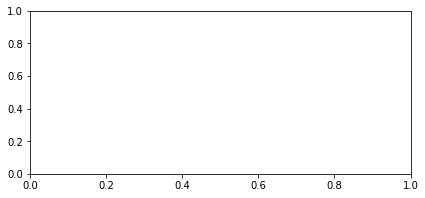

In [0]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(music_rms[0],color = 'r')
plt.title('RMS - Music')
plt.xlabel('Frame[n]')
plt.ylabel('RMS')
plt.subplot(1,2,2)
plt.plot(speech_rms[0],color = 'b')
plt.title('RMS - Speech')
plt.xlabel('Frame[n]')
plt.ylabel('RMS')


In [0]:
#percentage low energy frame
music_rms_one_second = []
speech_rms_one_second = []

onesecond = 22050
for i in range(len(music)):
  music_rms_one_second.append(((librosa.feature.rms(music[i],frame_length=onesecond, hop_length=onesecond)))[0])
  speech_rms_one_second.append(((librosa.feature.rms(speech[i],frame_length=onesecond, hop_length=onesecond)))[0])
  

music_rmslessthan50, speech_rmslessthan50 = [],[]
for i in range(len(music)):
  m,s = [],[]
  for b in range(2584):
    m.append((m_temp[i][b:b+87]<0.5*music_rms_one_second[i][int(b/87)]).sum()/87)
    s.append((s_temp[i][b:b+87]<0.5*speech_rms_one_second[i][int(b/87)]).sum()/87)
  music_rmslessthan50.append(m)  
  speech_rmslessthan50.append(s)
  
print('percentage of frames lower than rms power over a 1 second window extracted')

percentage of frames lower than rms power over a 1 second window extracted


Text(0, 0.5, 'Percentage')

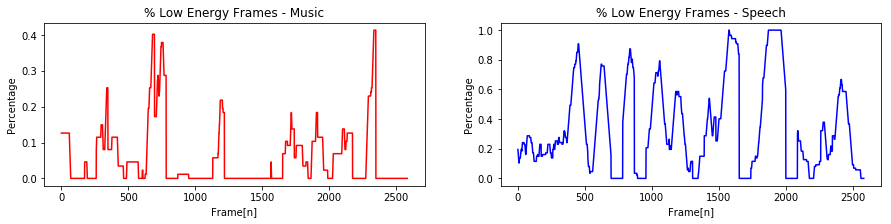

In [0]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(music_rmslessthan50[0],color = 'r')
plt.title('% Low Energy Frames - Music')
plt.xlabel('Frame[n]')
plt.ylabel('Percentage')
plt.subplot(1,2,2)
plt.plot(speech_rmslessthan50[0],color = 'b')
plt.title('% Low Energy Frames - Speech')
plt.xlabel('Frame[n]')
plt.ylabel('Percentage')

In [0]:
#zero-crossing
music_zcr = []
speech_zcr = []

for i in range(len(music)):
  music_zcr.append(norm((librosa.feature.zero_crossing_rate(music[i],frame_length=frame_len, hop_length=hop_len)))[0])
  speech_zcr.append(norm((librosa.feature.zero_crossing_rate(speech[i],frame_length=frame_len, hop_length=hop_len)))[0])
  
print('ZCR extracted and normalized')
len(music_zcr[0])

ZCR extracted and normalized


2584

Text(0, 0.5, 'ZCR')

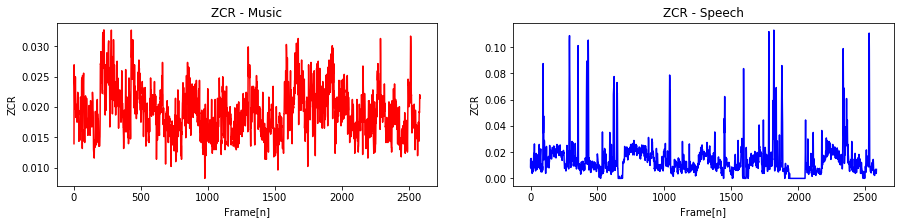

In [0]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(music_zcr[0],color = 'r')
plt.title('ZCR - Music')
plt.xlabel('Frame[n]')
plt.ylabel('ZCR')
plt.subplot(1,2,2)
plt.plot(speech_zcr[0],color = 'b')
plt.title('ZCR - Speech')
plt.xlabel('Frame[n]')
plt.ylabel('ZCR')

In [0]:
#spectral-roll-off

music_spec_roll = []
speech_spec_roll = []

for i in range(len(music)):
  music_spec_roll.append(norm((librosa.feature.spectral_rolloff(y=music[i], sr=22050, S=None, n_fft=frame_len, hop_length=hop_len, freq=None, roll_percent=0.85)))[0])
  speech_spec_roll.append(norm((librosa.feature.spectral_rolloff(y=speech[i], sr=22050, S=None, n_fft=frame_len, hop_length=hop_len, freq=None, roll_percent=0.85)))[0])


print('SRF extracted and normalized')

SRF extracted and normalized


Text(0, 0.5, '')

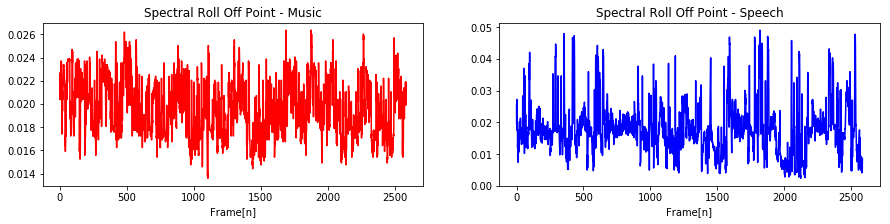

In [0]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(music_spec_roll[0],color = 'r')
plt.title('Spectral Roll Off Point - Music')
plt.xlabel('Frame[n]')
plt.ylabel('')
plt.subplot(1,2,2)
plt.plot(speech_spec_roll[0],color = 'b')
plt.title('Spectral Roll Off Point - Speech')
plt.xlabel('Frame[n]')
plt.ylabel('')

In [0]:
#MFCC
mfcc_size = 20
music_mfcc,speech_mfcc = [],[]
coef_indices = np.array([0,1,4,16])

for i in range(len(music)):
  mfcc_m,mfcc_s,m,s=librosa.feature.mfcc(y=music[i],sr=fs,n_fft=frame_len, hop_length=hop_len, n_mfcc=20),librosa.feature.mfcc(y=speech[i],sr=fs,n_fft=frame_len, hop_length=hop_len, n_mfcc=20),[],[]
  
  for b in range(len(music_zcr[0])):
    m.append(norm([mfcc_m[:,b]])[0])
    s.append(norm([mfcc_s[:,b]])[0])
  music_mfcc.append(m)
  speech_mfcc.append(s)
 
print('Number of coefficients per frame are: {size}'.format(size=mfcc_size))
print('MFC extracted and normalized')

Number of coefficients per frame are: 20
MFC extracted and normalized


TypeError: ignored

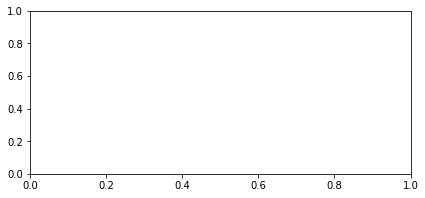

In [0]:

g = librosa.feature.mfcc(y=music[0],sr=fs,n_fft=frame_len, hop_length=hop_len, n_mfcc=20)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
#plt.plot(g[2],color = 'r')
plt.title('Spectral Roll Off Point - Music')
plt.xlabel('Frame[n]')
plt.ylabel('')
plt.subplot(1,2,2)
plt.plot(speech_mfcc[0],color = 'b')
plt.title('Spectral Roll Off Point - Speech')
plt.xlabel('Frame[n]')
plt.ylabel('')

In [0]:
#Spectral Centriod
music_spec_cent,speech_spec_cent = [],[]

for i in range (len(music)):
  music_spec_cent.append(norm(librosa.feature.spectral_centroid(y=music[i], sr=22050, S=None, n_fft=frame_len, hop_length=hop_len, freq=None))[0])
  speech_spec_cent.append(norm(librosa.feature.spectral_centroid(y=speech[i], sr=22050, S=None, n_fft=frame_len, hop_length=hop_len, freq=None))[0])

print('Spectral Centriod exracted and normalized')

Spectral Centriod exracted and normalized


Text(0, 0.5, '')

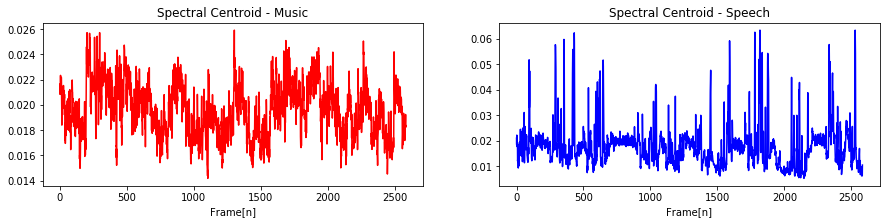

In [0]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(music_spec_cent[0],color = 'r')
plt.title('Spectral Centroid - Music')
plt.xlabel('Frame[n]')
plt.ylabel('')
plt.subplot(1,2,2)
plt.plot(speech_spec_cent[0],color = 'b')
plt.title('Spectral Centroid - Speech')
plt.xlabel('Frame[n]')
plt.ylabel('')

#Overlaying Audio Test

In [0]:


Audio(data=(music[0]/2+speech[0]),rate=fs)

#Training

##frame feature extraction + k-fold 

In [0]:
#extracting some frames from audio files
m_data, s_data = [],[]

num_frames = 646
frames = randint(0,len(music_rms[0]),num_frames)

for i in range(len(music)):
  for b in frames:
    m_data.append([c for c in music_mfcc[i][b]] +[music_rms[i][b],music_zcr[i][b],music_spec_roll[i][b],music_spec_cent[i][b],music_rmslessthan50[i][b]])
    s_data.append([c for c in speech_mfcc[i][b]] +[speech_rms[i][b],speech_zcr[i][b],speech_spec_roll[i][b],speech_spec_cent[i][b],speech_rmslessthan50[i][b]])

m_data = np.array(m_data)
s_data = np.array(s_data)

In [0]:
len(m_data[0])

In [0]:
#KFold stuff - 4 fold apparently


kfold = KFold(n_splits=4, shuffle=True ) # 4-fold testing, randomized with pseudo number set to 1

def data_split(m_data,s_data):
    x_train, y_train, x_test, y_test = [], [], [], []
    m_train, m_test, s_train, s_test = [], [], [], []
    
    for train, test in kfold.split(m_data):
        m_train.append(m_data[train])
        m_test.append(m_data[test])

    for train, test in kfold.split(s_data):
        s_train.append(s_data[train])
        s_test.append(s_data[test])
        
    for i in range (4):
        x_train_val = np.concatenate((m_train[i],s_train[i]))
        x_train.append(x_train_val)
        x_test_val = np.concatenate((m_test[i], s_test[i]))
        x_test.append(x_test_val)

    no_hits_train = len(x_train[0])/2
    no_hits_test = len(x_test[0])/2
    y_train = np.append(np.ones(int(no_hits_train)), np.zeros(int(no_hits_train)))
    y_test = np.append(np.ones(int(no_hits_test)), np.zeros(int(no_hits_test)))
    
    return x_train, y_train, x_test, y_test
    
    
x_train, y_train, x_test, y_test = data_split(m_data,s_data) 

In [0]:
joblib.dump(x_test, 'gdrive/My Drive/dsp_project/files/Models/x_test_646_V2.pkl')
joblib.dump(x_train,'gdrive/My Drive/dsp_project/files/Models/x_train_646_V2.pkl')
joblib.dump(y_test, 'gdrive/My Drive/dsp_project/files/Models/y_test_646_V2.pkl')
joblib.dump(y_train, 'gdrive/My Drive/dsp_project/files/Models/y_train_646_V2.pkl')


In [0]:
x_test=joblib.load('gdrive/My Drive/dsp_project/files/Models/x_test-2.pkl')
joblib.dump(x_test,'gdrive/My Drive/dsp_project/files/Models/x_test-3.pkl')


##KNN 

In [0]:
neigh1 = KNeighborsClassifier()
neigh2 = KNeighborsClassifier()
neigh3 = KNeighborsClassifier()
neigh4 = KNeighborsClassifier()

X = x_train[0]
y = y_train
neigh1.fit(X, y)

X = x_train[1]
y = y_train
neigh2.fit(X, y)

X = x_train[2]
y = y_train
neigh3.fit(X, y)

X = x_train[3]
y = y_train
neigh4.fit(X, y)


joblib.dump(neigh1, 'gdrive/My Drive/dsp_project/files/Models/neigh1_646_V2.pkl') 
joblib.dump(neigh2, 'gdrive/My Drive/dsp_project/files/Models/neigh2_646_V2.pkl') 
joblib.dump(neigh3, 'gdrive/My Drive/dsp_project/files/Models/neigh3_646_V2.pkl') 
joblib.dump(neigh4, 'gdrive/My Drive/dsp_project/files/Models/neigh4_646_V2.pkl') 

##SVM

In [0]:
clf = SVC(gamma='auto',probability= True)
X = x_train[0]
y = y_train
clf.fit(X, y)

joblib.dump(clf, 'clf.pkl') 

In [0]:
prob_svc = clf.predict_proba(x_test[0])

plt.figure(figsize=(15, 4))
plt.subplot(1,2,1, autoscale_on=True, aspect='auto')
plt.plot(prob_svc[0:int(len(prob)/2),1])
plt.title('Frames that are music - probability that they are music')

plt.subplot(1,2,2,autoscale_on=True, aspect = 'auto')
plt.plot(prob_svc[int(len(prob)/2):,1])
plt.title('Frames that are speech - probability that they are speech')

plt.tight_layout()

##Nu-SVM

In [0]:
nu_svm1 = svm.NuSVC(gamma = 'auto', probability = True )
X = x_train[0]
y = y_train
nu_svm1.fit(X,y)
joblib.dump(nu_svm1, 'gdrive/My Drive/dsp_project/files/Models/nu_svm1_646.pkl') 

nu_svm2 = svm.NuSVC(gamma = 'auto', probability = True )
X = x_train[1]
y = y_train
nu_svm2.fit(X,y)

joblib.dump(nu_svm2, 'gdrive/My Drive/dsp_project/files/Models/nu_svm2_646.pkl')

nu_svm3 = svm.NuSVC(gamma = 'auto', probability = True )
X = x_train[2]
y = y_train
nu_svm3.fit(X,y)
joblib.dump(nu_svm3, 'gdrive/My Drive/dsp_project/files/Models/nu_svm3_646.pkl') 

nu_svm4 = svm.NuSVC(gamma = 'auto', probability = True )
X = x_train[3]
y = y_train
nu_svm4.fit(X,y)

joblib.dump(nu_svm4, 'gdrive/My Drive/dsp_project/files/Models/nu_svm4_646.pkl') 

In [0]:
nu_svm = joblib.load('nu_svm.pkl') 

In [0]:
prob_nu_svm = nu_svm.predict_proba(x_test[0])

fig = plt.figure(figsize=(15,3))


music_prob = prob_nu_svm[0:int(len(prob)/2)]
speech_prob = prob_nu_svm[int(len(prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')



In [0]:
#inset code to show mesh grid


##Random Forest

In [0]:
rf1 = RandomForestClassifier(n_estimators=100)
X = x_train[0]
y = y_train
rf1.fit(X,y)

rf2 = RandomForestClassifier(n_estimators=100)
X = x_train[1]
y = y_train
rf2.fit(X,y)

rf3 = RandomForestClassifier(n_estimators=100)
X = x_train[2]
y = y_train
rf3.fit(X,y)

rf4 = RandomForestClassifier(n_estimators=100)
X = x_train[3]
y = y_train
rf4.fit(X,y)


joblib.dump(rf1, 'gdrive/My Drive/dsp_project/files/Models/rf1_646_V2.pkl')
joblib.dump(rf2, 'gdrive/My Drive/dsp_project/files/Models/rf2_646_V2.pkl')
joblib.dump(rf3, 'gdrive/My Drive/dsp_project/files/Models/rf3_646_V2.pkl')
joblib.dump(rf4, 'gdrive/My Drive/dsp_project/files/Models/rf4_646_V2.pkl')

# Analysis of Models

##Load Models

In [0]:
x_test =joblib.load('gdrive/My Drive/dsp_project/files/Models/x_test_646_V2.pkl')
y_test = joblib.load('gdrive/My Drive/dsp_project/files/Models/y_test_646_V2.pkl')

neigh1 = joblib.load('gdrive/My Drive/dsp_project/files/Models/neigh1_646_V2.pkl')
neigh2 = joblib.load('gdrive/My Drive/dsp_project/files/Models/neigh2_646_V2.pkl')
neigh3 = joblib.load('gdrive/My Drive/dsp_project/files/Models/neigh3_646_V2.pkl')
neigh4 = joblib.load('gdrive/My Drive/dsp_project/files/Models/neigh4_646_V2.pkl')

nu_svm1 = joblib.load('gdrive/My Drive/dsp_project/files/Models/nu_svm1_646.pkl')
nu_svm2 = joblib.load('gdrive/My Drive/dsp_project/files/Models/nu_svm2_646.pkl')
nu_svm3 = joblib.load('gdrive/My Drive/dsp_project/files/Models/nu_svm3_646.pkl')
nu_svm4 = joblib.load('gdrive/My Drive/dsp_project/files/Models/nu_svm4_646.pkl')

rf1 = joblib.load('gdrive/My Drive/dsp_project/files/Models/rf1_646_V2.pkl')
rf2 = joblib.load('gdrive/My Drive/dsp_project/files/Models/rf2_646_V2.pkl')
rf3 = joblib.load('gdrive/My Drive/dsp_project/files/Models/rf3_646_V2.pkl')
rf4 = joblib.load('gdrive/My Drive/dsp_project/files/Models/rf4_646_V2.pkl')

##KNN

In [0]:
knn1_prob = neigh1.predict_proba(x_test[0])
knn2_prob = neigh2.predict_proba(x_test[1])
knn3_prob = neigh3.predict_proba(x_test[2])
knn4_prob = neigh4.predict_proba(x_test[3])


###KNN1 - Music and speech plot

In [0]:
#fig = plt.figure(figsize=(15,3))


music_prob = knn1_prob[0:int(len(knn1_prob)/2)]
speech_prob = knn1_prob[int(len(knn1_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='knn1 - music and speech')

###KNN2 - Music and speech plot

In [0]:
#fig = plt.figure(figsize=(15,3))


music_prob = knn2_prob[0:int(len(knn2_prob)/2)]
speech_prob = knn2_prob[int(len(knn2_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='knn2 - music and speech')

###KNN3 - Music and speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = knn3_prob[0:int(len(knn3_prob)/2)]
speech_prob = knn3_prob[int(len(knn3_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='knn3 - music + speech')

###KNN4 - Music and speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = knn4_prob[0:int(len(knn4_prob)/2)]
speech_prob = knn4_prob[int(len(knn4_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='knn4 - music + speech')

###Music Plots of all folds

In [0]:
fig = plt.figure(figsize=(15,3))





knn1_music = go.Histogram(
    x=knn1_prob[0:int(len(knn1_prob)/2),1],
    opacity=0.75,  name='KNN1'
)
knn2_music = go.Histogram(
    x=knn2_prob[0:int(len(knn2_prob)/2),1],
    opacity=0.75,  name='KNN2'
)
knn3_music = go.Histogram(
    x=knn3_prob[0:int(len(knn3_prob)/2),1],
    opacity=0.75,  name='KNN3'
)

knn4_music = go.Histogram(
    x=knn4_prob[0:int(len(knn4_prob)/2),1],
    opacity=0.75,  name='KNN4'
)



data = [knn1_music, knn2_music,knn3_music,knn4_music]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')



<Figure size 1080x216 with 0 Axes>

###Speech Plots of all folds

In [0]:
fig = plt.figure(figsize=(15,3))



knn1_speech = go.Histogram(
    x=knn1_prob[int(len(knn1_prob)/2):,0],
    opacity=0.75,  name='KNN1'
)
knn2_speech = go.Histogram(
    x=knn2_prob[int(len(knn2_prob)/2):,0],
    opacity=0.75,  name='KNN2'
)
knn3_speech = go.Histogram(
    x=knn3_prob[int(len(knn3_prob)/2):,0],
    opacity=0.75,  name='KNN3'
)

knn4_speech = go.Histogram(
    x=knn4_prob[int(len(knn4_prob)/2):,0],
    opacity=0.75,  name='KNN4'
)



data = [knn1_speech, knn2_speech,knn3_speech,knn4_speech]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

<Figure size 1080x216 with 0 Axes>

###ROC AUC for all 4 KNN models

In [0]:
knn1_roc_auc = roc_auc(knn1_prob,y_test)
knn2_roc_auc = roc_auc(knn2_prob,y_test)
knn3_roc_auc = roc_auc(knn3_prob,y_test)
knn4_roc_auc = roc_auc(knn4_prob,y_test)


print('AUC1 = {a1}\nAUC2 = {a2}\nAUC3 = {a3}\nAUC4 = {a4}'.format(a1 = knn1_roc_auc[3],a2 = knn2_roc_auc[3],a3 = knn3_roc_auc[3], a4 = knn4_roc_auc[3]))

AUC1 = 0.9233615411867147
AUC2 = 0.9235729648291102
AUC3 = 0.923531587124625
AUC4 = 0.9211684245646585


In [0]:

trace0 = go.Scatter(
    x = knn1_roc_auc[0],
    y = knn1_roc_auc[1],
    mode = 'lines',
    name = 'KNN1'
)
trace1 = go.Scatter(
    x = knn2_roc_auc[0],
    y = knn2_roc_auc[1],
    mode = 'lines',
    name = 'KNN2'
)
trace2 = go.Scatter(
    x = knn3_roc_auc[0],
    y = knn3_roc_auc[1],
    mode = 'lines',
    name = 'KNN3'
)

trace3 = go.Scatter(
    x = knn4_roc_auc[0],
    y = knn4_roc_auc[1],
    name = 'KNN4'
)

trace4 = go.Scatter(
    x = np.linspace(0,1,len(knn4_roc_auc[0]),endpoint=True),
    y = np.linspace(0,1,len(knn4_roc_auc[0]),endpoint=True),
    name = 'Reference-line',
    line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
     dash = 'dash')
   
)



data = [trace0, trace1, trace2,trace3,trace4]
fig = go.Figure(data=data)
py.iplot(fig, filename='line-mode')

##NUSVM

In [0]:
nu_svm1_prob = nu_svm1.predict_proba(x_test[0])
nu_svm2_prob = nu_svm2.predict_proba(x_test[1])
nu_svm3_prob = nu_svm3.predict_proba(x_test[2])
nu_svm4_prob = nu_svm4.predict_proba(x_test[3])

###NuSVM1 - Music and Speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = nu_svm1_prob[0:int(len(nu_svm1_prob)/2)]
speech_prob = nu_svm1_prob[int(len(nu_svm1_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

<Figure size 1080x216 with 0 Axes>

###NuSVM2 - Music and Speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = nu_svm2_prob[0:int(len(nu_svm2_prob)/2)]
speech_prob = nu_svm2_prob[int(len(nu_svm2_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

###NuSVM3 - Music and Speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = nu_svm3_prob[0:int(len(nu_svm3_prob)/2)]
speech_prob = nu_svm3_prob[int(len(nu_svm3_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

###NuSVM4 - Music and Speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = nu_svm4_prob[0:int(len(nu_svm4_prob)/2)]
speech_prob = nu_svm4_prob[int(len(nu_svm4_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

###Music Plot of all folds

In [0]:
fig = plt.figure(figsize=(15,3))



nu_svm1_music = go.Histogram(
    x=nu_svm1_prob[0:int(len(nu_svm1_prob)/2),1],
    opacity=0.75,  name='SVM1'
)
nu_svm2_music = go.Histogram(
    x=nu_svm2_prob[0:int(len(nu_svm2_prob)/2),1],
    opacity=0.75,  name='SVM2'
)
nu_svm3_music = go.Histogram(
    x=nu_svm3_prob[0:int(len(nu_svm3_prob)/2),1],
    opacity=0.75,  name='SVM3'
)

nu_svm4_music = go.Histogram(
    x=nu_svm4_prob[0:int(len(nu_svm4_prob)/2),1],
    opacity=0.75,  name='SVM4'
)



data = [nu_svm1_music, nu_svm2_music,nu_svm3_music,nu_svm4_music]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

<Figure size 1080x216 with 0 Axes>

###Speech Plot of all folds

In [0]:
fig = plt.figure(figsize=(15,3))


nu_svm1_speech = go.Histogram(
    x=nu_svm1_prob[int(len(nu_svm1_prob)/2):,0],
    opacity=0.75,  name='SVM1'
)
nu_svm2_speech = go.Histogram(
    x=nu_svm2_prob[int(len(nu_svm2_prob)/2):,0],
    opacity=0.75,  name='SVM2'
)
nu_svm3_speech = go.Histogram(
    x=nu_svm3_prob[int(len(nu_svm3_prob)/2):,0],
    opacity=0.75,  name='SVM3'
)

nu_svm4_speech = go.Histogram(
    x=nu_svm4_prob[int(len(nu_svm4_prob)/2):,0],
    opacity=0.75,  name='SVM4'
)



data = [nu_svm1_speech, nu_svm2_speech,nu_svm3_speech,nu_svm4_speech]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

<Figure size 1080x216 with 0 Axes>

###ROC and AUC of all 4 SVMs

In [0]:
svm1_roc_auc = roc_auc(nu_svm1_prob,y_test)
svm2_roc_auc = roc_auc(nu_svm2_prob,y_test)
svm3_roc_auc = roc_auc(nu_svm3_prob,y_test)
svm4_roc_auc = roc_auc(nu_svm4_prob,y_test)

print('AUC1 = {a1}\nAUC2 = {a2}\nAUC3 = {a3}\nAUC4 = {a4}'.format(a1 = svm1_roc_auc[3],a2 = svm2_roc_auc[3],a3 = svm3_roc_auc[3], a4 = svm4_roc_auc[3]))

AUC1 = 0.8880004947165339
AUC2 = 0.8902406146511277
AUC3 = 0.8862850305958194
AUC4 = 0.8849030733005685


In [0]:
trace0 = go.Scatter(
    x = svm1_roc_auc[0],
    y = svm1_roc_auc[1],
    mode = 'lines',
    name = 'SVM1'
)
trace1 = go.Scatter(
    x = svm2_roc_auc[0],
    y = svm2_roc_auc[1],
    mode = 'lines',
    name = 'SVM2'
)
trace2 = go.Scatter(
    x = svm3_roc_auc[0],
    y = svm3_roc_auc[1],
    mode = 'lines',
    name = 'SVM3'
)

trace3 = go.Scatter(
    x = svm4_roc_auc[0],
    y = svm4_roc_auc[1],
    mode = 'lines',
    name = 'SVM4'
)

trace4 = go.Scatter(
    x = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    y = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    mode = 'lines',
    name = 'Reference-line',
    line = dict(color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dash') 
)



data = [trace0, trace1, trace2,trace3,trace4]
fig = go.Figure(data=data)
py.iplot(fig, filename='line-mode')

##Random Forrest

In [0]:
rf1_prob = rf1.predict_proba(x_test[0])
rf2_prob = rf2.predict_proba(x_test[1])
rf3_prob = rf3.predict_proba(x_test[2])
rf4_prob = rf4.predict_proba(x_test[3])


###RF1 - Music and Speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = rf1_prob[0:int(len(rf1_prob)/2)]
speech_prob = rf1_prob[int(len(rf1_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

###RF2 - Music and Speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = rf2_prob[0:int(len(rf2_prob)/2)]
speech_prob = rf2_prob[int(len(rf2_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

###RF3 - Music and Speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = rf3_prob[0:int(len(rf3_prob)/2)]
speech_prob = rf3_prob[int(len(rf3_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

###RF4 - Music and Speech plot

In [0]:
fig = plt.figure(figsize=(15,3))


music_prob = rf4_prob[0:int(len(rf4_prob)/2)]
speech_prob = rf4_prob[int(len(rf4_prob)/2):]



music_prob = go.Histogram(
    x=music_prob[:,1],
    opacity=0.75,  name='music'
)
speech_prob = go.Histogram(
    x=speech_prob[:,0],
    opacity=0.75,  name='speech'
)

data = [music_prob, speech_prob]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

###Music plot of all 4 folds

In [0]:
fig = plt.figure(figsize=(15,3))





rf1_music = go.Histogram(
    x=rf1_prob[0:int(len(rf1_prob)/2),1],
    opacity=0.75,  name='RF1'
)
rf2_music = go.Histogram(
    x=rf2_prob[0:int(len(rf2_prob)/2),1],
    opacity=0.75,  name='RF2'
)
rf3_music = go.Histogram(
    x=rf3_prob[0:int(len(rf3_prob)/2),1],
    opacity=0.75,  name='RF3'
)

rf4_music = go.Histogram(
    x=rf4_prob[0:int(len(rf4_prob)/2),1],
    opacity=0.75,  name='RF4'
)



data = [rf1_music, rf2_music,rf3_music,rf4_music]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')



<Figure size 1080x216 with 0 Axes>

###Speech plot of all 4 folds

In [0]:
fig = plt.figure(figsize=(15,3))



rf1_speech = go.Histogram(
    x=rf1_prob[int(len(rf1_prob)/2):,0],
    opacity=0.75,  name='RF1'
)
rf2_speech = go.Histogram(
    x=rf2_prob[int(len(rf2_prob)/2):,0],
    opacity=0.75,  name='RF2'
)
rf3_speech = go.Histogram(
    x=rf3_prob[int(len(rf3_prob)/2):,0],
    opacity=0.75,  name='RF3'
)

rf4_speech = go.Histogram(
    x=rf4_prob[int(len(rf4_prob)/2):,0],
    opacity=0.75,  name='RF4'
)



data = [rf1_speech, rf2_speech,rf3_speech,rf4_speech]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

<Figure size 1080x216 with 0 Axes>

###ROC AUC of all 4 RF

In [0]:
rf1_roc_auc = roc_auc(rf1_prob,y_test)
rf2_roc_auc = roc_auc(rf2_prob,y_test)
rf3_roc_auc = roc_auc(rf3_prob,y_test)
rf4_roc_auc = roc_auc(rf4_prob,y_test)

print('AUC1 = {a1}\nAUC2 = {a2}\nAUC3 = {a3}\nAUC4 = {a4}'.format(a1 = rf1_roc_auc[3],a2 = rf2_roc_auc[3],a3 = rf3_roc_auc[3], a4 = rf4_roc_auc[3]))

AUC1 = 0.9743352974349774
AUC2 = 0.9733428737156017
AUC3 = 0.9729235506262042
AUC4 = 0.9710975306707028


In [0]:
trace0 = go.Scatter(
    x = rf1_roc_auc[0],
    y = rf1_roc_auc[1],
    mode = 'lines',
    name = 'RF1'
)
trace1 = go.Scatter(
    x = rf2_roc_auc[0],
    y = rf2_roc_auc[1],
    mode = 'lines',
    name = 'RF2'
)
trace2 = go.Scatter(
    x = rf3_roc_auc[0],
    y = rf3_roc_auc[1],
    mode = 'lines',
    name = 'RF3'
)

trace3 = go.Scatter(
    x = rf4_roc_auc[0],
    y = rf4_roc_auc[1],
    mode = 'lines',
    name = 'RF4'
)

trace4 = go.Scatter(
    x = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    y = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    mode = 'lines',
    name = 'Reference-line',
    line = dict(color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dash') 
)



data = [trace0, trace1, trace2,trace3,trace4]
fig = go.Figure(data=data)
py.iplot(fig, filename='line-mode')

# ROC AUC

##Dataset 1

In [0]:
trace0 = go.Scatter(
    x = rf1_roc_auc[0],
    y = rf1_roc_auc[1],
    mode = 'lines',
    name = 'random forest'
)
trace1 = go.Scatter(
    x = svm1_roc_auc[0],
    y = svm1_roc_auc[1],
    mode = 'lines',
    name = 'SVM'
)
trace2 = go.Scatter(
    x = knn1_roc_auc[0],
    y = knn1_roc_auc[1],
    mode = 'lines',
    name = 'KNN'
)
trace3 = go.Scatter(
    x = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    y = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    mode = 'lines',
    name = 'Reference-line',
    line = dict(color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dash') 
)
data = [trace0, trace1, trace2,trace3]
fig = go.Figure(data=data)
py.iplot(fig, filename='line-mode')

##Data set 2

In [0]:
trace0 = go.Scatter(
    x = rf2_roc_auc[0],
    y = rf2_roc_auc[1],
    mode = 'lines',
    name = 'random forest'
)
trace1 = go.Scatter(
    x = svm2_roc_auc[0],
    y = svm2_roc_auc[1],
    mode = 'lines',
    name = 'SVM'
)
trace2 = go.Scatter(
    x = knn2_roc_auc[0],
    y = knn2_roc_auc[1],
    mode = 'lines',
    name = 'KNN'
)
trace3 = go.Scatter(
    x = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    y = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    mode = 'lines',
    name = 'Reference-line',
    line = dict(color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dash') 
)
data = [trace0, trace1, trace2,trace3]
fig = go.Figure(data=data)
py.iplot(fig, filename='line-mode')

##Data Set 3

In [0]:
trace0 = go.Scatter(
    x = rf3_roc_auc[0],
    y = rf3_roc_auc[1],
    mode = 'lines',
    name = 'random forest'
)
trace1 = go.Scatter(
    x = svm3_roc_auc[0],
    y = svm3_roc_auc[1],
    mode = 'lines',
    name = 'SVM'
)
trace2 = go.Scatter(
    x = knn3_roc_auc[0],
    y = knn3_roc_auc[1],
    mode = 'lines',
    name = 'KNN'
)
trace3 = go.Scatter(
    x = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    y = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    mode = 'lines',
    name = 'Reference-line',
    line = dict(color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dash') 
)
data = [trace0, trace1, trace2,trace3]
fig = go.Figure(data=data)
py.iplot(fig, filename='line-mode')

##Data Set 4

In [0]:
trace0 = go.Scatter(
    x = rf4_roc_auc[0],
    y = rf4_roc_auc[1],
    mode = 'lines',
    name = 'random forest'
)
trace1 = go.Scatter(
    x = svm4_roc_auc[0],
    y = svm4_roc_auc[1],
    mode = 'lines',
    name = 'SVM'
)
trace2 = go.Scatter(
    x = knn4_roc_auc[0],
    y = knn4_roc_auc[1],
    mode = 'lines',
    name = 'KNN'
)
trace3 = go.Scatter(
    x = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    y = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    mode = 'lines',
    name = 'Reference-line',
    line = dict(color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dash') 
)
data = [trace0, trace1, trace2,trace3]
fig = go.Figure(data=data)
py.iplot(fig, filename='line-mode')

##Combined

In [0]:
knn_roc_auc_combined = [(knn1_roc_auc[0] + knn2_roc_auc[0] + knn3_roc_auc[0] + knn4_roc_auc[0])/4, (knn1_roc_auc[1] + knn2_roc_auc[1] + knn3_roc_auc[1] + knn4_roc_auc[1])/4,(knn1_roc_auc[3] + knn2_roc_auc[3] + knn3_roc_auc[3] + knn4_roc_auc[3])/4 ]
svm_roc_auc_combined =  [(svm1_roc_auc[0]), (svm1_roc_auc[1]) ,(svm1_roc_auc[3] + svm2_roc_auc[3] + svm3_roc_auc[3] + svm4_roc_auc[3])/4 ]
rf_roc_auc_combined = [(rf1_roc_auc[0] + rf2_roc_auc[0] + rf3_roc_auc[0] + rf4_roc_auc[0])/4, (rf1_roc_auc[1] + rf2_roc_auc[1] + rf3_roc_auc[1] + rf4_roc_auc[1])/4,(rf1_roc_auc[3] + rf2_roc_auc[3] + rf3_roc_auc[3] + rf4_roc_auc[3])/4 ]

trace0 = go.Scatter(
    x = knn_roc_auc_combined[0],
    y = knn_roc_auc_combined[1],
    mode = 'lines',
    name = 'knn'
)
trace1 = go.Scatter(
    x = svm_roc_auc_combined[0],
    y = svm_roc_auc_combined[1],
    mode = 'lines',
    name = 'svm'
)
trace2 = go.Scatter(
    x = rf_roc_auc_combined[0],
    y = rf_roc_auc_combined[1],
    mode = 'lines',
    name = 'RF'
)



trace3 = go.Scatter(
    x = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    y = np.linspace(0,1,len(svm2_roc_auc[0]),endpoint=True),
    mode = 'lines',
    name = 'Reference-line',
    line = dict(color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dash') 
)



data = [trace0, trace1, trace2,trace3]
fig = go.Figure(data=data)
py.iplot(fig, filename='line-mode')



In [0]:
print('\t  AUC\nKNN : {knn}'.format(knn=knn_roc_auc_combined[2]))
print('SVM : {svm}'.format(svm=svm_roc_auc_combined[2]))
print('RF  : {rf}'.format(rf = rf_roc_auc_combined[2]))

	  AUC
KNN : 0.9229086294262772
SVM : 0.8873573033160125
RF  : 0.9729248131118715


#ROC Function

In [0]:
def roc_auc(prob,y_test):
  scores =prob[:,1] #(prob[0:int(len(prob)/2),1]).tolist() +(prob[int(len(prob)/2):,1]).tolist() #[prob[0:int(len(prob)/2),1]] 
  fpr, tpr, thresholds = metrics.roc_curve(y_test,scores)
  roc_auc = metrics.auc(fpr, tpr)
  
  metric =[fpr,tpr,thresholds,roc_auc]
  return metric

#Rap Music Test


##Data Aquisition

In [0]:
path = 'gdrive/My Drive/dsp_project/files/' 
freestyle_dir = path +'rap_music/Freestyles'
intrumental_dir = 'gdrive/My Drive/dsp_project/files/' + 'music_files'#'rap_music/Instrumental'

freestyle_files = os.listdir(freestyle_dir)
intrumental_files = os.listdir(intrumental_dir)
intrumental_files = intrumental_files[0:len(freestyle_files)]

4

In [0]:
dataset = []
samplerate = []
for free in freestyle_files:
  data_free, fs1 = librosa.load(freestyle_dir+'/'+free,duration=30)
  for instru in intrumental_files:
    data_instru, fs2 = librosa.load(intrumental_dir+'/'+instru, duration=30)
    samplerate.append([fs1,fs2])
    dataset.append([data_free,data_instru,(data_instru/2+data_free)])
  

In [0]:
joblib.dump(dataset, 'gdrive/My Drive/dsp_project/files/rapdataset.pkl')

In [0]:
Audio(data = dataset[2][2], rate =fs1)

##Feautre Extraction Process

In [0]:
dataset = joblib.load('gdrive/My Drive/dsp_project/files/rapdataset.pkl')

In [0]:
feature_space =[]

for i in dataset:
  feature_space.append([featextract(i[0]),featextract(i[1]),featextract(i[2])])


In [0]:
knn_rap,svm_rap,rf_rap =[],[],[]


for i in feature_space:
  neigh_1,neigh_2,neigh_3 = neigh1.predict_proba(i[0]),neigh1.predict_proba(i[1]),neigh1.predict_proba(i[2])
  svm_1, svm_2,svm_3 = nu_svm1.predict_proba(i[0]),nu_svm1.predict_proba(i[1]),nu_svm1.predict_proba(i[2])
  rf_1, rf_2, rf_3 = rf1.predict_proba(i[0]),rf1.predict_proba(i[1]),rf1.predict_proba(i[2]) 
  knn_rap.append([neigh_1,neigh_2,neigh_3])
  svm_rap.append([svm_1,svm_2,svm_3])
  rf_rap.append([rf_1,rf_2,rf_3])
  



In [0]:
knn_rap = np.array(knn_rap)
svm_rap = np.array(svm_rap)
rf_rap = np.array(rf_rap)

In [0]:
pos = [2,6,10,14]

average_knn = (np.sum(a=knn_rap[pos],axis=0))/len(pos)
average_svm = (np.sum(a=svm_rap[pos],axis=0))/len(pos)
average_rf = (np.sum(a=rf_rap[pos],axis=0))/len(pos)


In [0]:
joblib.dump(knn_rap,'gdrive/My Drive/dsp_project/files/Models/knn_rap.pkl')
joblib.dump(svm_rap,'gdrive/My Drive/dsp_project/files/Models/svm_rap.pkl')
joblib.dump(rf_rap,'gdrive/My Drive/dsp_project/files/Models/rf_rap.pkl')
joblib.dump(average_knn,'gdrive/My Drive/dsp_project/files/Models/average_knn.pkl')
joblib.dump(average_svm,'gdrive/My Drive/dsp_project/files/Models/average_svm.pkl')
joblib.dump(average_rf,'gdrive/My Drive/dsp_project/files/Models/average_rf.pkl')


['gdrive/My Drive/dsp_project/files/Models/average_rf.pkl']

In [0]:
knn_rap = joblib.load('gdrive/My Drive/dsp_project/files/Models/knn_rap.pkl')
svm_rap = joblib.load('gdrive/My Drive/dsp_project/files/Models/svm_rap.pkl')
rf_rap = joblib.load('gdrive/My Drive/dsp_project/files/Models/rf_rap.pkl')
average_knn = joblib.load('gdrive/My Drive/dsp_project/files/Models/average_knn.pkl')
average_svm = joblib.load('gdrive/My Drive/dsp_project/files/Models/average_svm.pkl')
average_rf = joblib.load('gdrive/My Drive/dsp_project/files/Models/average_rf.pkl')



In [0]:
average = [average_knn,average_svm,average_rf]

##Results

###SVM

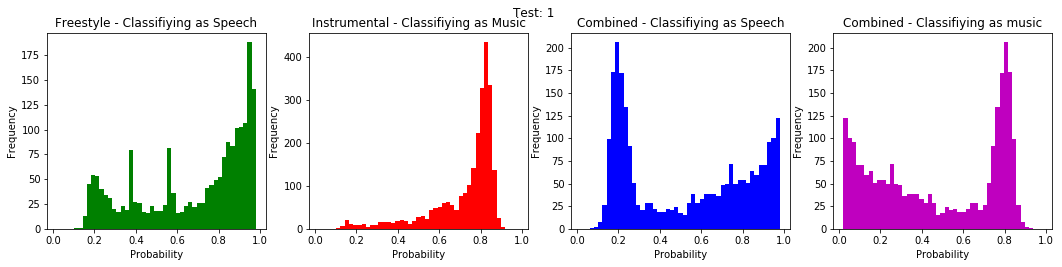

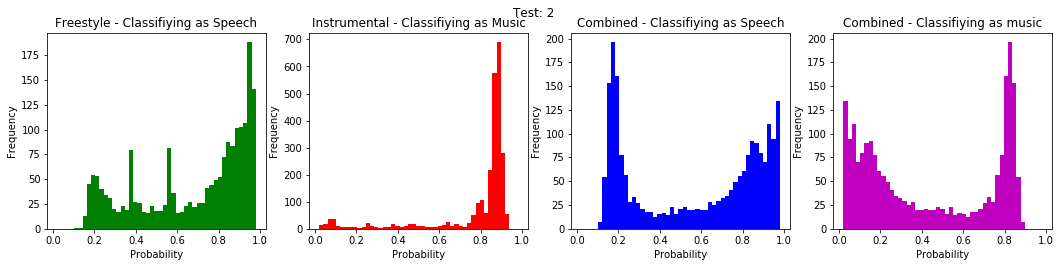

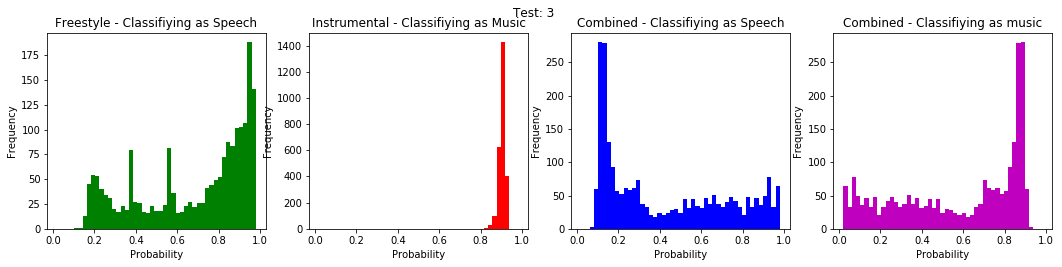

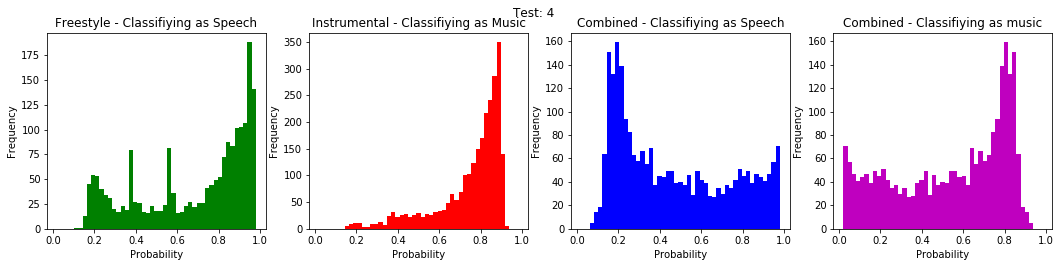

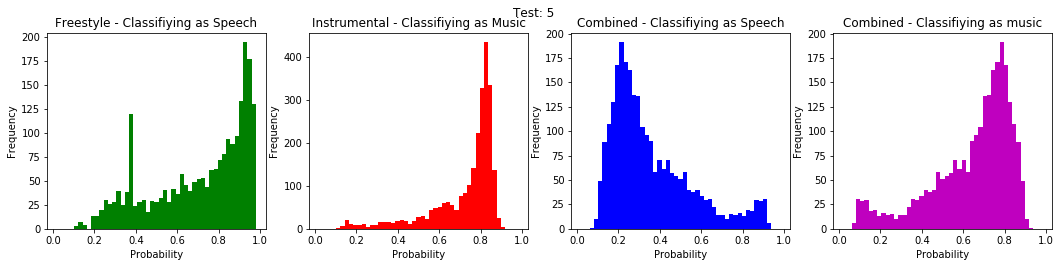

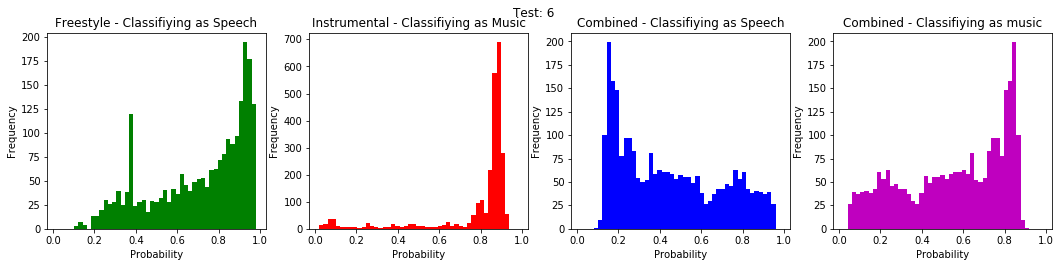

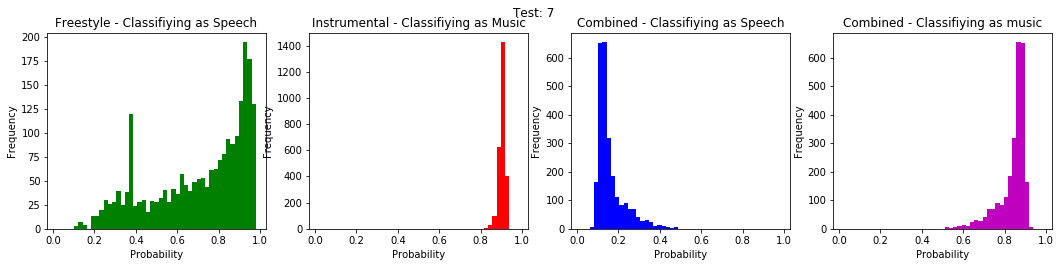

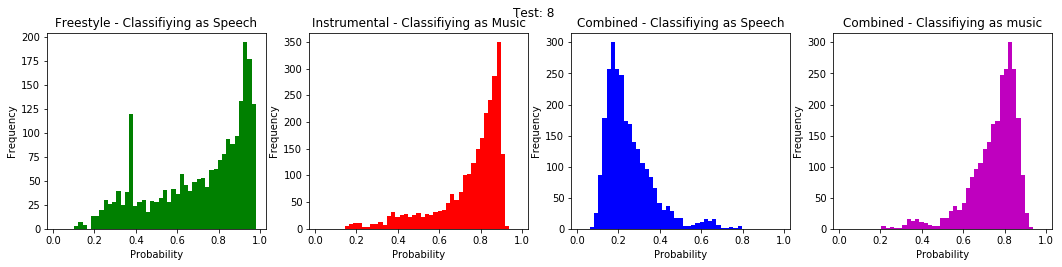

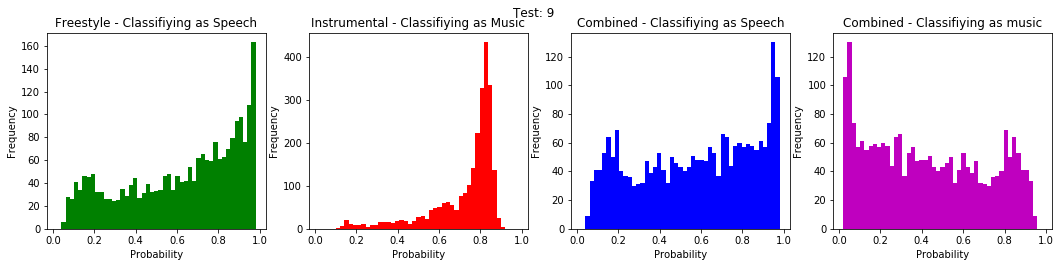

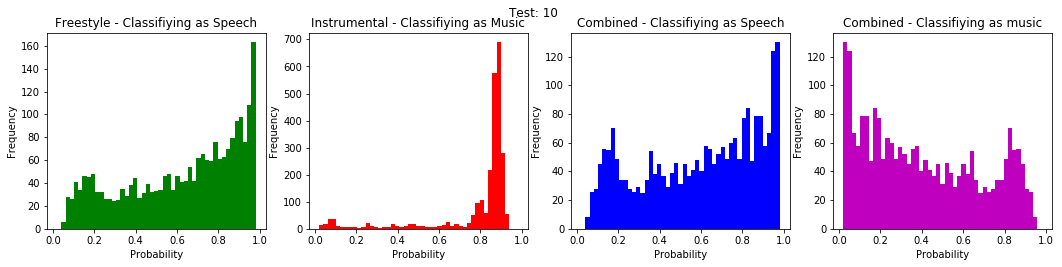

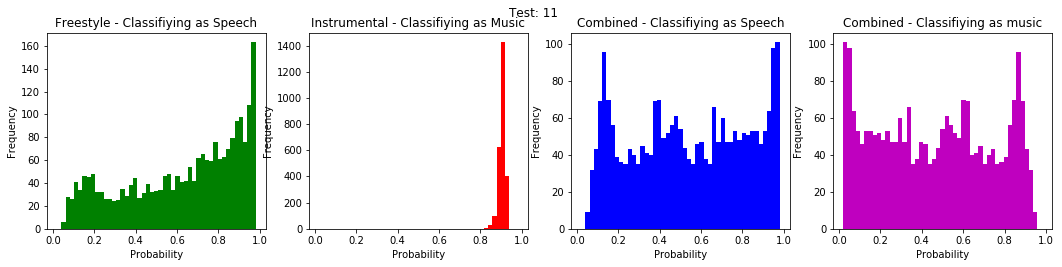

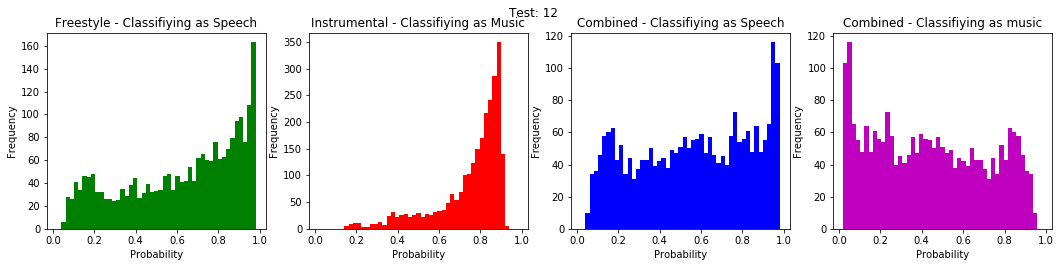

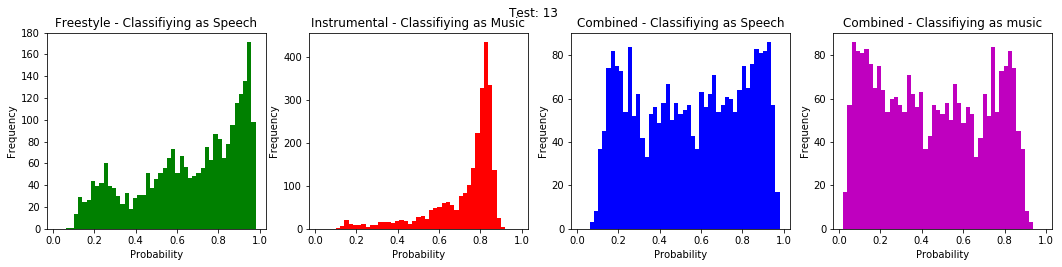

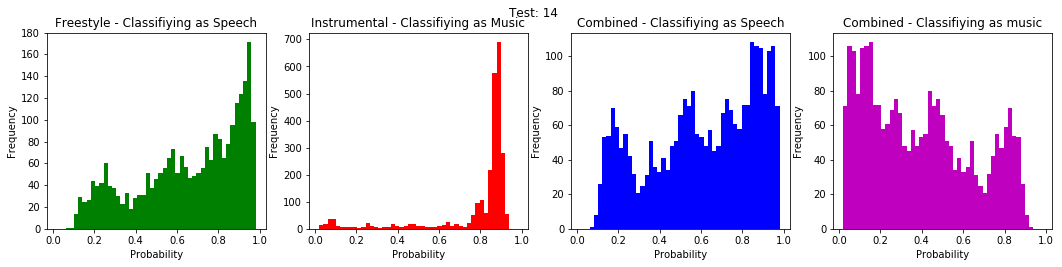

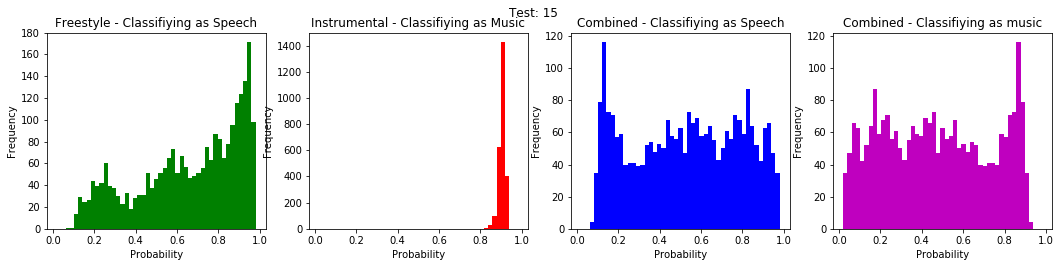

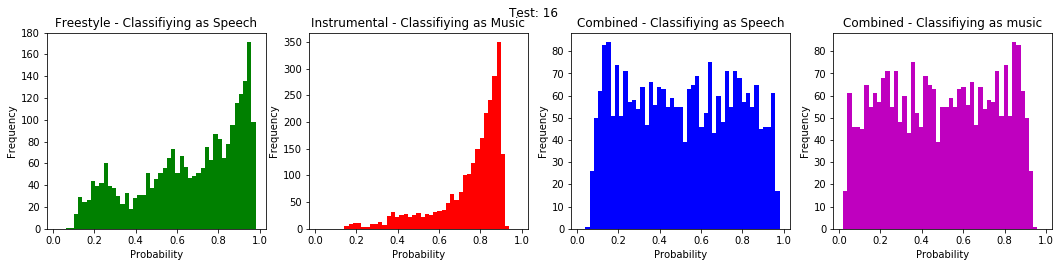

In [0]:
bins = np.linspace(0,1,50)
bins = bins[1:len(bins)-1]

for i in range(len(feature_space)):
  fig = plt.figure(i+1,figsize = (18,3.6))
  fig.suptitle('Test: {num}'.format(num=(i+1)))
  plt.subplot(1,4,1)
  mike = plt.hist(svm_rap[i][0][:,0], bins,facecolor ='g')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.title('Freestyle - Classifiying as Speech')
  plt.subplot(1,4,2)
  is_ = plt.hist(svm_rap[i][1][:,1], bins,facecolor ='r')
  plt.title('Instrumental - Classifiying as Music')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.subplot(1,4,3)
  a = plt.hist(svm_rap[i][2][:,0], bins,facecolor ='b')
  plt.title('Combined - Classifiying as Speech')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.subplot(1,4,4)
  poes=plt.hist(svm_rap[i][2][:,1], bins,facecolor ='m')
  plt.title('Combined - Classifiying as music')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.savefig('SVM_Rap_Test{num}.png'.format(num=(i+1)))
  plt.show()
  
  

###KNN

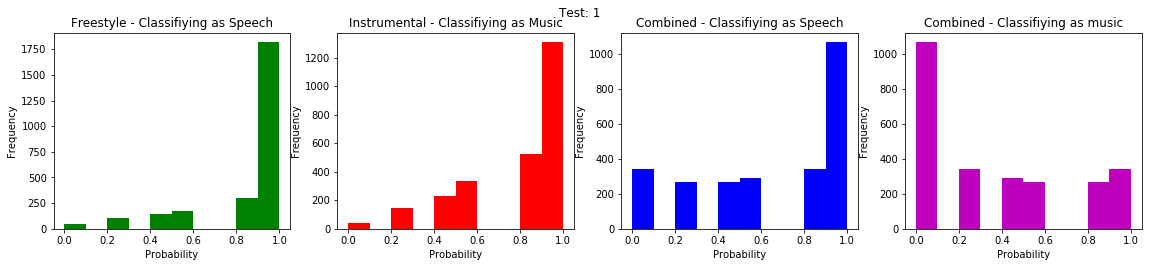

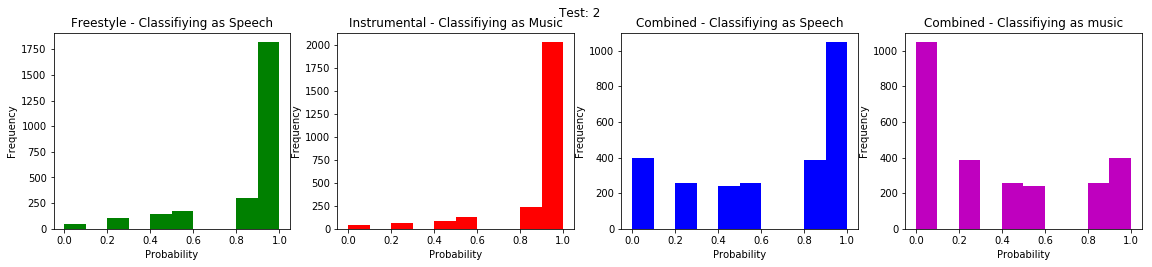

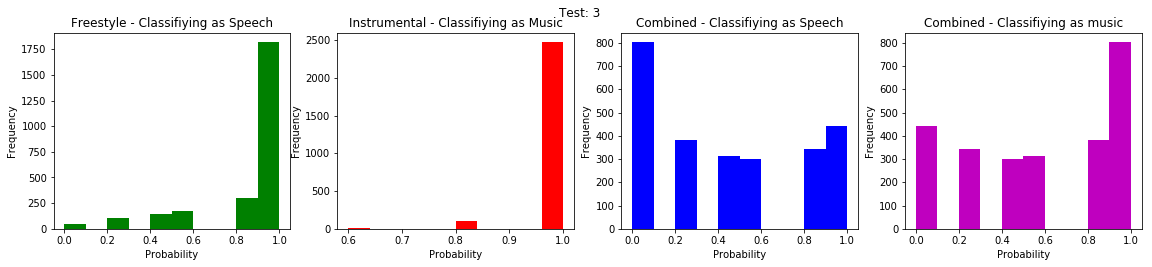

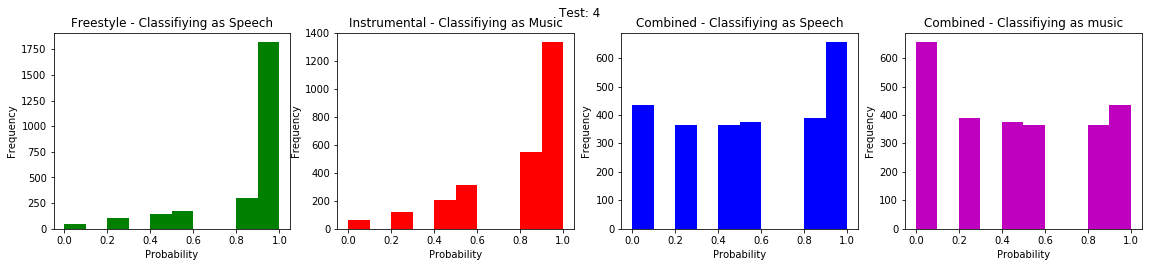

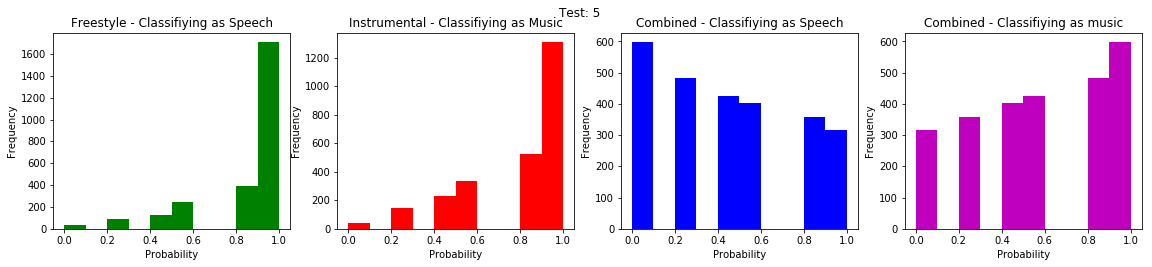

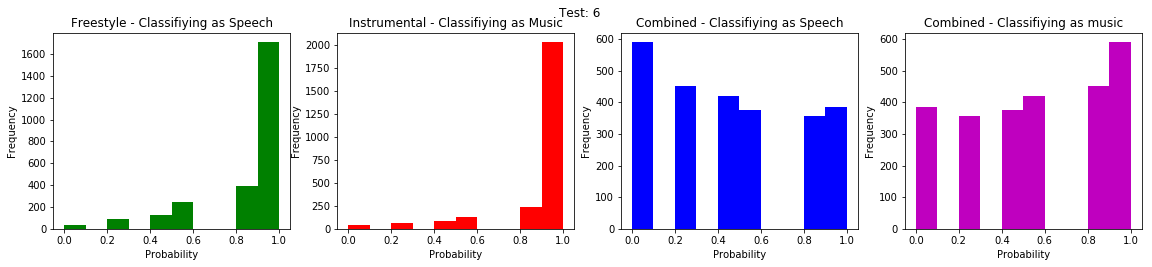

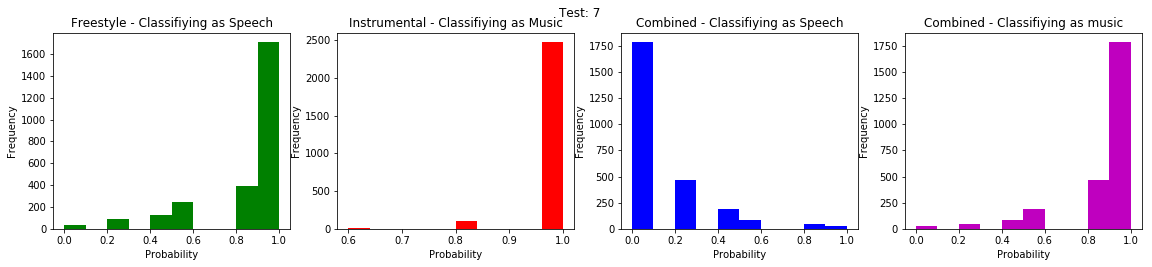

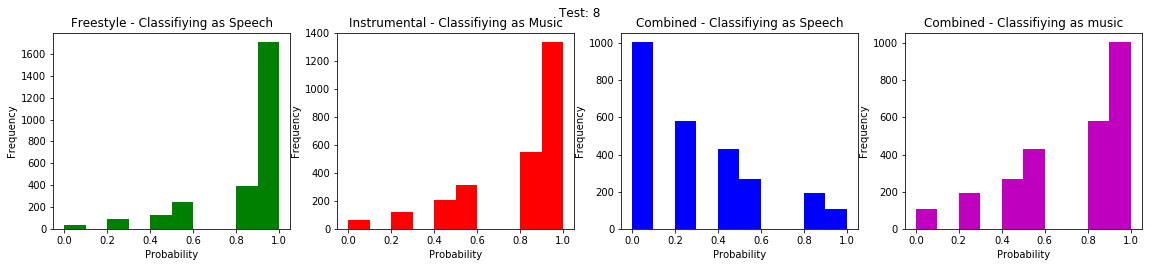

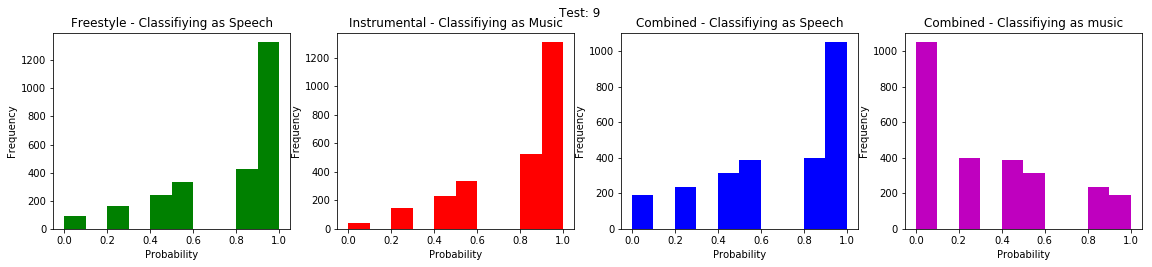

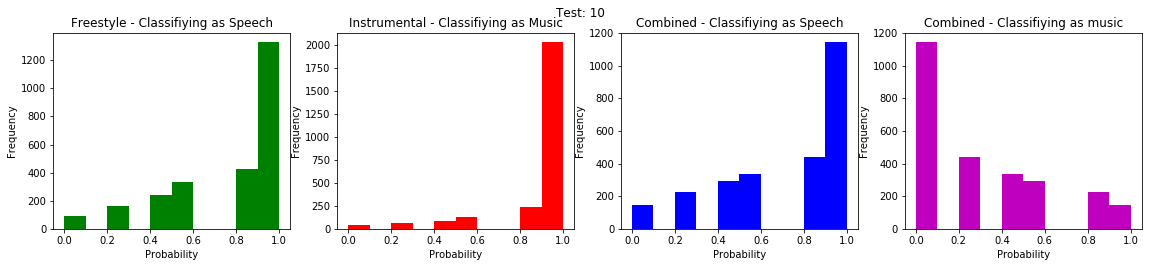

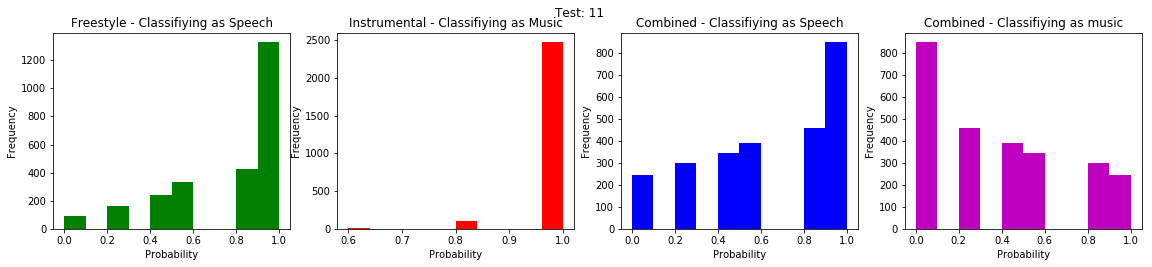

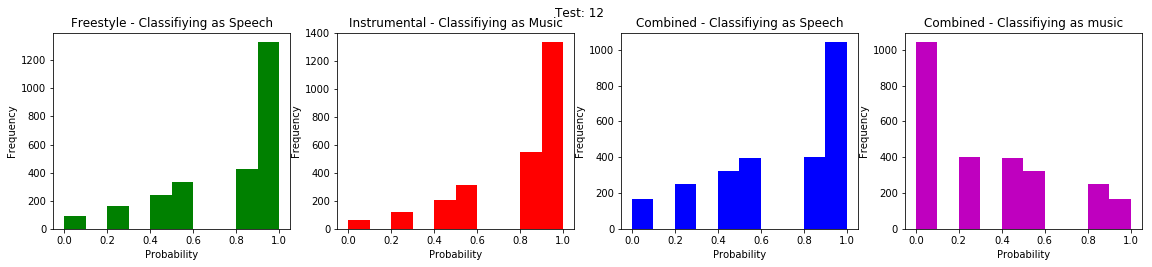

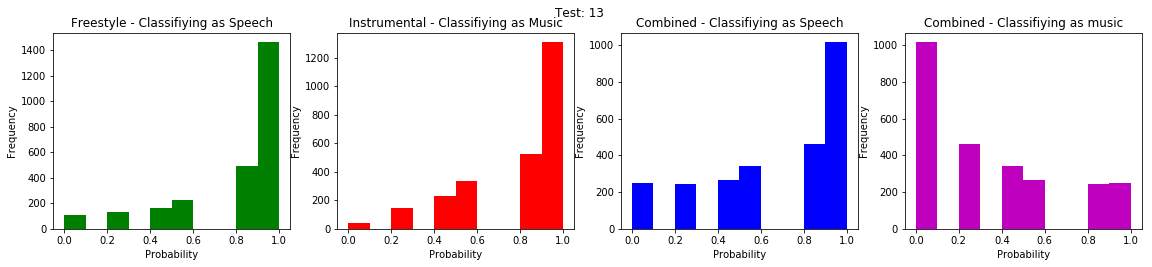

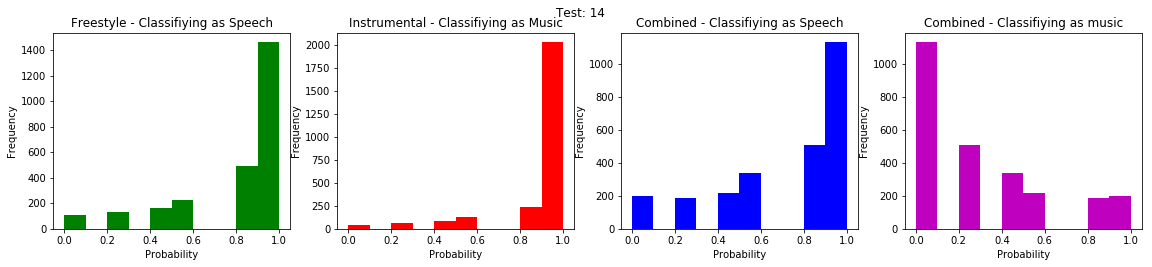

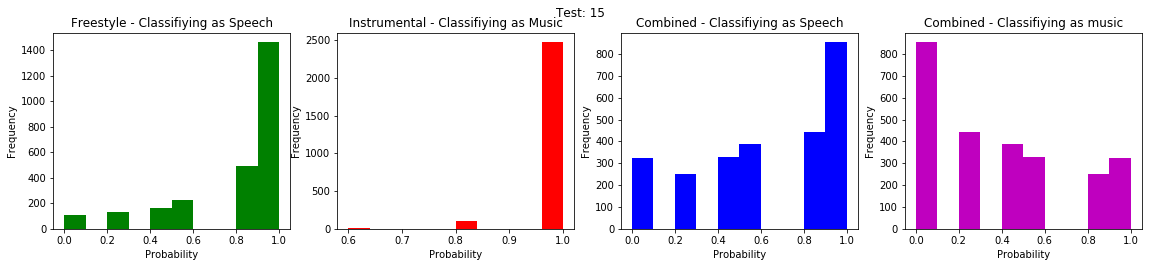

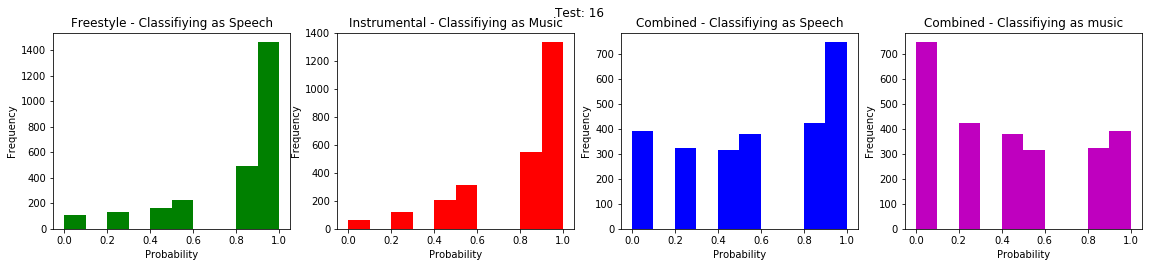

In [0]:
bins = np.linspace(0,1,3)
bins = bins[1:len(bins)-1]

for i in range(len(feature_space)):
  fig = plt.figure(i+1,figsize = (19.5,3.6))
  fig.suptitle('Test: {num}'.format(num=(i+1)))
  plt.subplot(1,4,1)
  mike = plt.hist(knn_rap[i][0][:,0],facecolor ='g')
  plt.title('Freestyle - Classifiying as Speech')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.subplot(1,4,2)
  is_ = plt.hist(knn_rap[i][1][:,1],facecolor ='r')
  plt.title('Instrumental - Classifiying as Music')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.subplot(1,4,3)
  a = plt.hist(knn_rap[i][2][:,0],facecolor ='b')
  plt.title('Combined - Classifiying as Speech')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.subplot(1,4,4)
  poes=plt.hist(knn_rap[i][2][:,1],facecolor ='m')
  plt.title('Combined - Classifiying as music')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  
  plt.savefig('KNN_Rap_Test{num}.png'.format(num=(i+1)))
  
  plt.show()

###RF

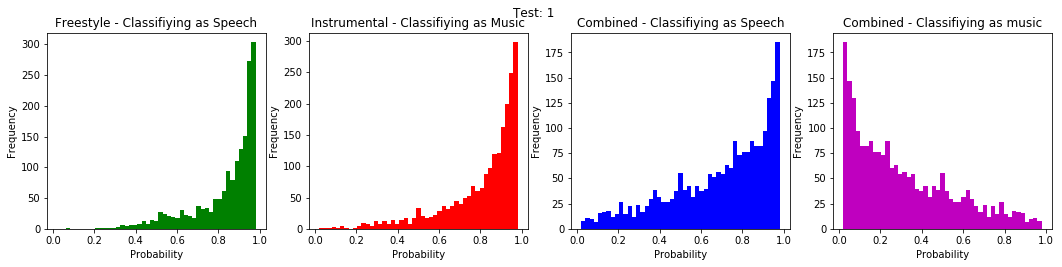

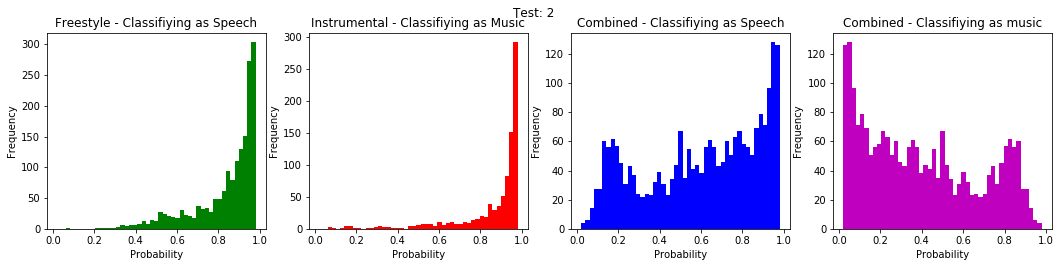

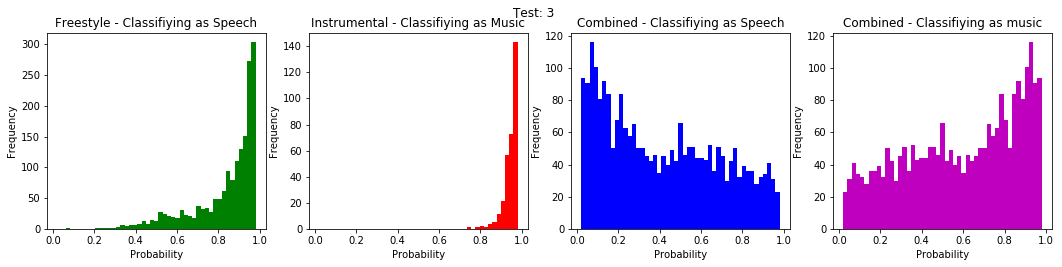

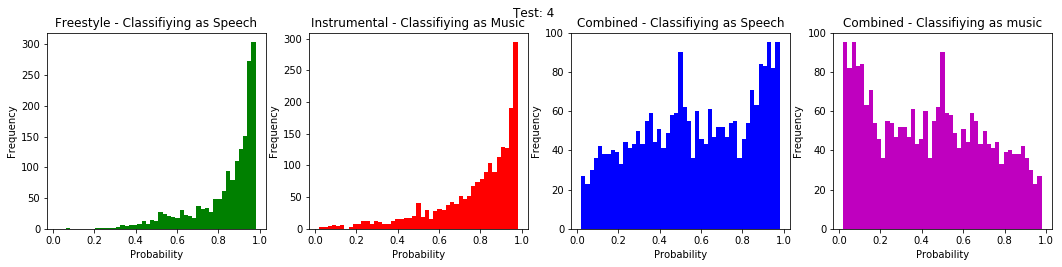

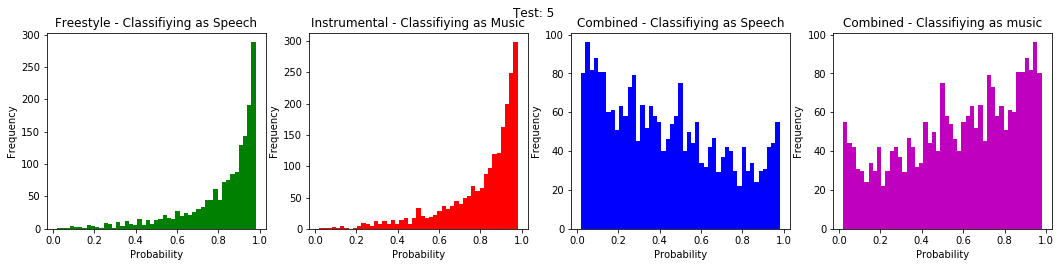

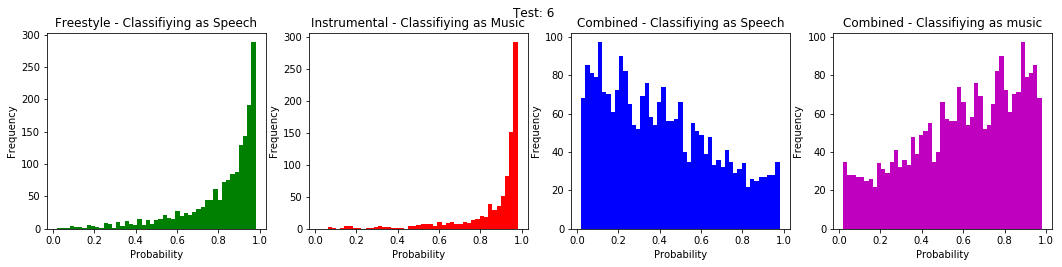

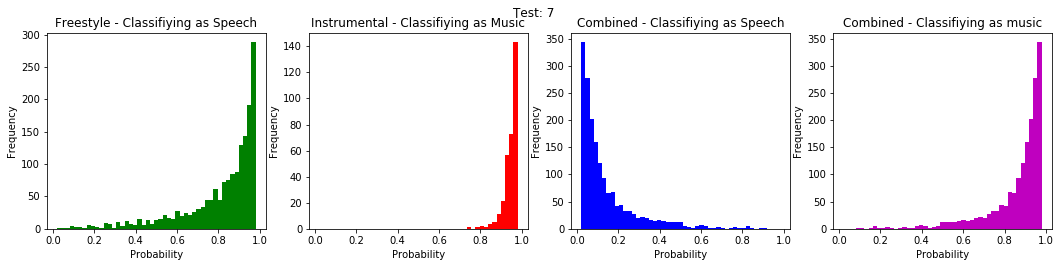

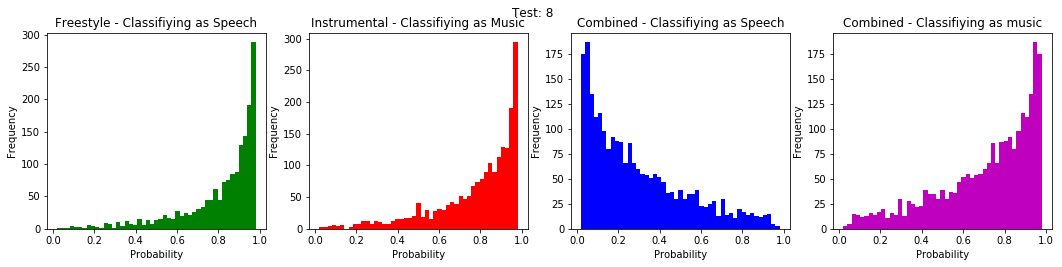

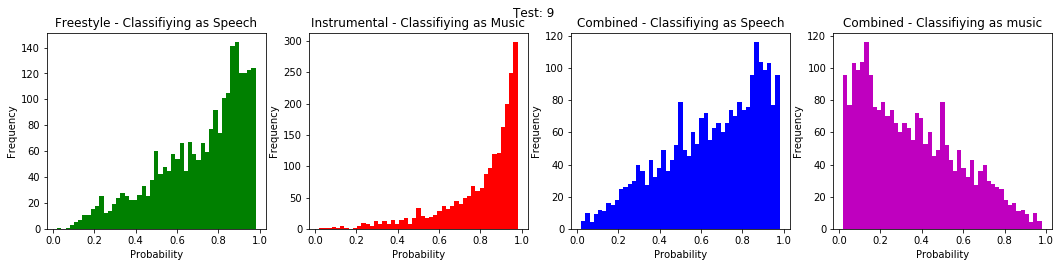

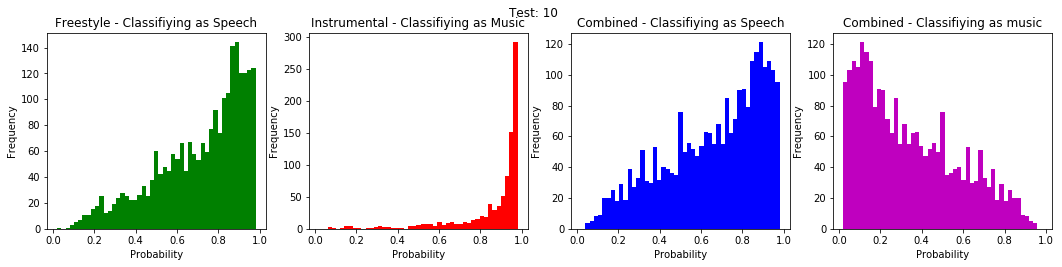

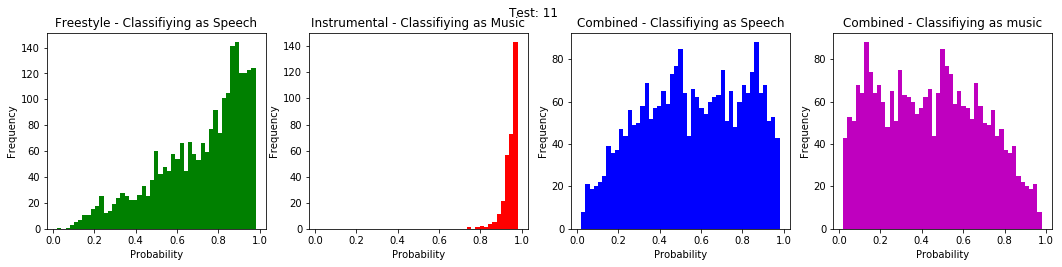

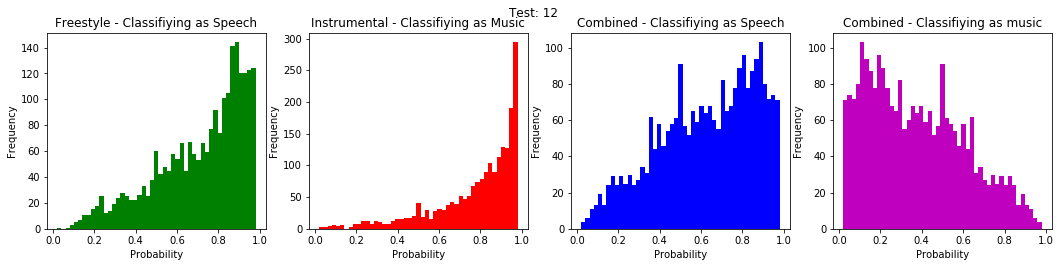

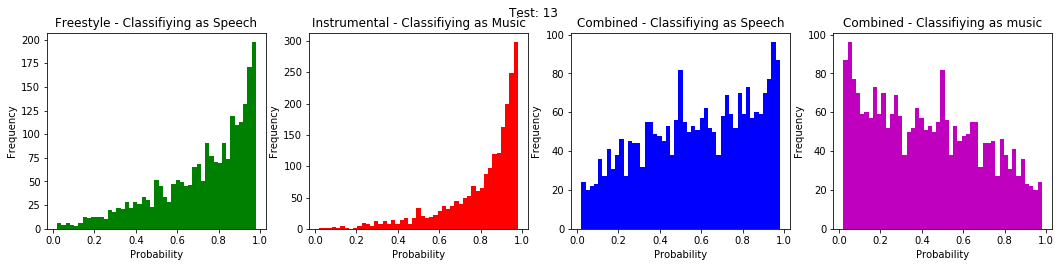

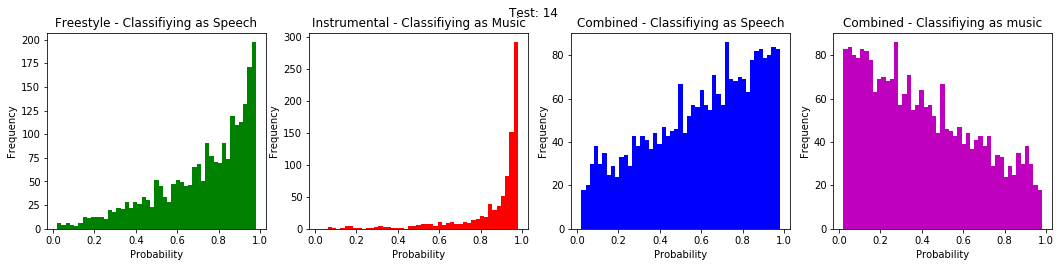

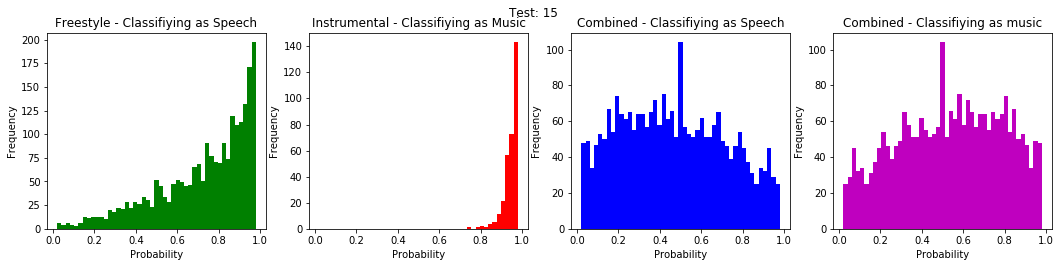

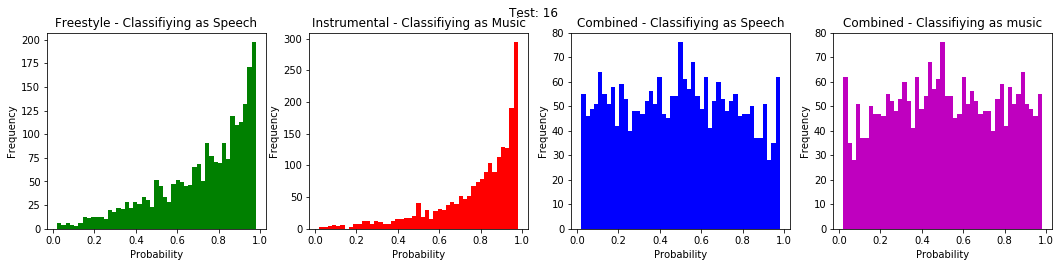

In [0]:
bins = np.linspace(0,1,50)
bins = bins[1:len(bins)-1]

for i in range(len(feature_space)):
  fig = plt.figure(i+1,figsize = (18,3.6))
  fig.suptitle('Test: {num}'.format(num=(i+1)))
  plt.subplot(1,4,1)
  mike = plt.hist(rf_rap[i][0][:,0], bins,facecolor ='g')
  plt.title('Freestyle - Classifiying as Speech')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.subplot(1,4,2)
  is_ = plt.hist(rf_rap[i][1][:,1], bins,facecolor ='r')
  plt.title('Instrumental - Classifiying as Music')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.subplot(1,4,3)
  a = plt.hist(rf_rap[i][2][:,0], bins,facecolor ='b')
  plt.title('Combined - Classifiying as Speech')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.subplot(1,4,4)
  poes=plt.hist(rf_rap[i][2][:,1], bins,facecolor ='m')
  plt.title('Combined - Classifiying as music')
  plt.xlabel('Probability')
  plt.ylabel('Frequency')
  plt.savefig('RF_Rap_Test{num}.png'.format(num=(i+1)))
  plt.show()

###Compasion of Model (Averaged)

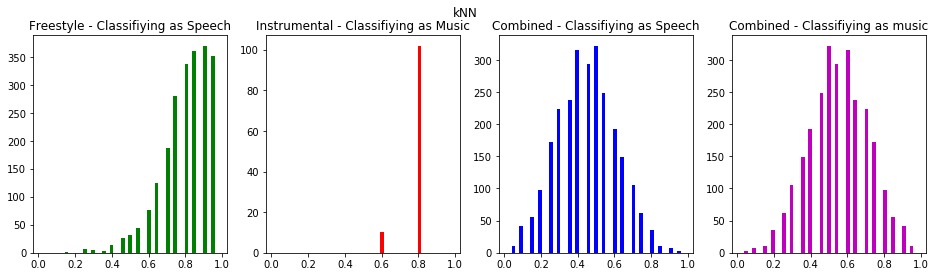

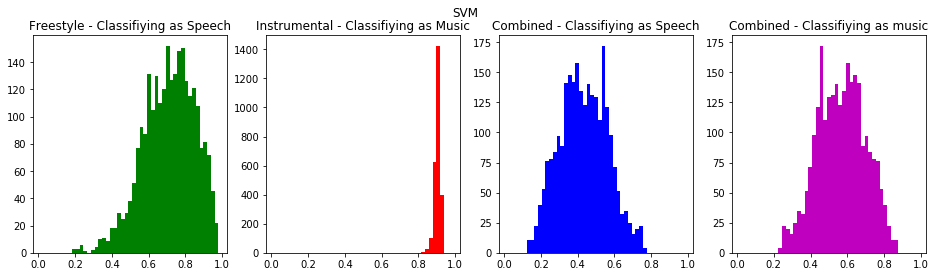

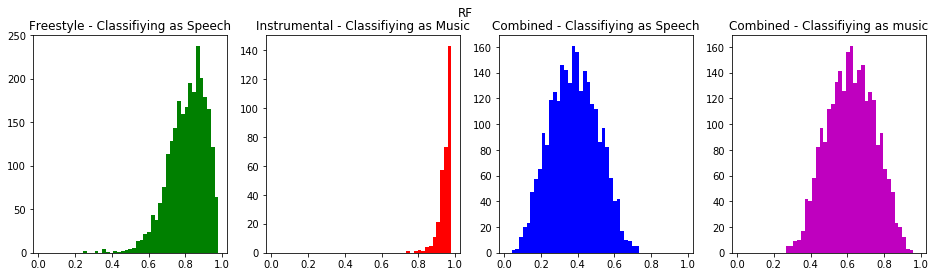

In [0]:
bins = np.linspace(0,1,50)
bins = bins[1:len(bins)-1]
titles = ['kNN','SVM','RF']
for i in range(len(average)):
  fig = plt.figure(i+1,figsize = (16,4))
  fig.suptitle(titles[i])
  plt.subplot(1,4,1)
  mike = plt.hist(average[i][0][:,0], bins,facecolor ='g')
  plt.title('Freestyle - Classifiying as Speech')
  plt.subplot(1,4,2)
  is_ = plt.hist(average[i][1][:,1], bins,facecolor ='r')
  plt.title('Instrumental - Classifiying as Music')
  plt.subplot(1,4,3)
  a = plt.hist(average[i][2][:,0], bins,facecolor ='b')
  plt.title('Combined - Classifiying as Speech')
  plt.subplot(1,4,4)
  poes=plt.hist(average[i][2][:,1], bins,facecolor ='m')
  plt.title('Combined - Classifiying as music')
  
  plt.show()

###Skewness

In [0]:
titles = ['kNN','SVM','RF']
for i in range(len(average)):
  print(titles[i])
  print('Skewness of Freestyle(Classifying as speech)  :  {ans}'.format(ans=stats.skew(average[i][0][:,0])))
  print('Skewness of Intrumental(Classifying as Music) :  {ans}'.format(ans=stats.skew(average[i][1][:,1])))
  print('Skewness of Combined(Classifying as Speech)   :  {ans}'.format(ans=stats.skew(average[i][2][:,0])))
  print('Skewness of Combined(Classifying as Music)   :  {ans}\n '.format(ans=stats.skew(average[i][2][:,1])))




kNN
Skewness of Freestyle(Classifying as speech)  :  -0.9835160903047729
Skewness of Intrumental(Classifying as Music) :  -5.192281847420349
Skewness of Combined(Classifying as Speech)   :  0.0768207832055174
Skewness of Combined(Classifying as Music)   :  -0.07682078320551725
 
SVM
Skewness of Freestyle(Classifying as speech)  :  -0.4802401849455289
Skewness of Intrumental(Classifying as Music) :  -1.1042113513073728
Skewness of Combined(Classifying as Speech)   :  0.07014233049274168
Skewness of Combined(Classifying as Music)   :  -0.07014233049274306
 
RF
Skewness of Freestyle(Classifying as speech)  :  -0.8605998861103895
Skewness of Intrumental(Classifying as Music) :  -3.747969107628339
Skewness of Combined(Classifying as Speech)   :  0.04203431020019347
Skewness of Combined(Classifying as Music)   :  -0.04203431020019339
 


#Feature extractor method

In [0]:
(-0.9835160903047729-0.4802401849455289-0.8605998861103895)/3

-0.7747853871202305

In [0]:
def featextract(data):
  
  window_size = 23.22e-3
  frame_len = 512
  hop_len = round(frame_len/2)
  
  rms = ((librosa.feature.rms(data,frame_length=frame_len, hop_length=hop_len)))[0]
  zcr = norm((librosa.feature.zero_crossing_rate(data,frame_length=frame_len, hop_length=hop_len)))[0]
  spec_roll = norm((librosa.feature.spectral_rolloff(y=data, sr=22050, S=None, n_fft=frame_len, hop_length=hop_len, freq=None, roll_percent=0.85)))[0]
  mfcc=librosa.feature.mfcc(y=data,sr=22050,n_fft=frame_len, hop_length=hop_len, n_mfcc=20)
  
  m =[]
  coef_indices = np.array([0,1,4,16])
  
  for b in range(len(zcr)):
    m.append(norm([mfcc[coef_indices,b]])[0])
  
  spec_cent =norm(librosa.feature.spectral_centroid(y=data, sr=22050, S=None, n_fft=frame_len, hop_length=hop_len, freq=None))[0]
  
  
  
  onesecond = 22050
  rms_one_second = (((librosa.feature.rms(data,frame_length=onesecond, hop_length=onesecond)))[0])
  rmslessthan50 = []

  for b in range(len(zcr)):
    rmslessthan50.append((rms[b:b+87]<0.5*rms_one_second[int(b/87)]).sum()/87)



  
  rms = norm([rms])[0]
 
  feat = []
  frames = len(zcr)
  for b in range(frames):
    feat.append([c for c in m[b]] +[rms[b],zcr[b],spec_roll[b],spec_cent[b],rmslessthan50[b]])
  return feat



#Messing About

In [0]:
average= [np.sum(knn_rap[:)]

In [0]:
len(average)

In [0]:
type(np.array(knn_rap))

In [0]:
a = np.array(knn_rap)
b= np.sum(a[:,0])